In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
df.shape

(195, 43)

In [7]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df.columns = list(map(str, df.columns))

df.set_index('Country', inplace=True)

df['Total'] = df.sum(axis = 1)

years = list(map(str, range(1980, 2014)))

print('data dimensions:', df.shape)

data dimensions: (195, 38)


In [8]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [16]:
df_c = df.groupby('Continent', axis = 0).sum()
df_c

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


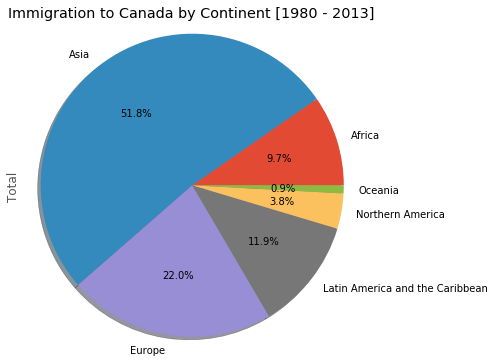

In [34]:
df_c['Total'].plot(kind="pie", figsize = (6, 6), autopct='%1.1f%%', startangle=0, shadow = True)
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')
plt.show()

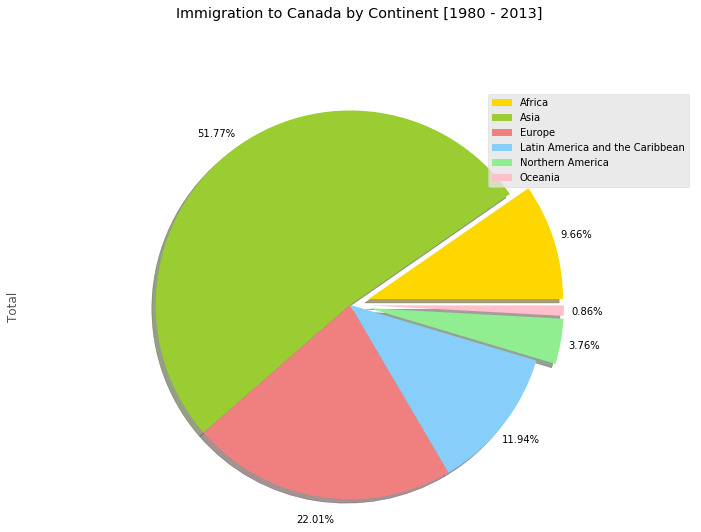

In [85]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_c['Total'].plot(kind="pie", figsize = (12, 8), autopct = '%1.2f%%', startangle = 0, shadow = True, 
                   labels = None, pctdistance=1.12, colors = colors_list, explode = explode_list)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y = 1.15)
plt.axis('equal')
plt.legend(labels = df_c.index, loc = "upper right")
plt.show()

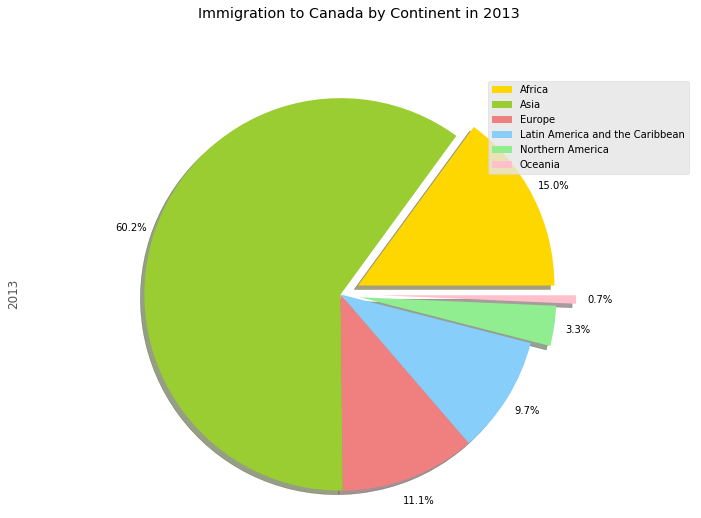

In [94]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_c['2013'].plot(kind= "pie", figsize = (12, 8), autopct = "%1.1f%%", startangle = 0, shadow = True, labels = None,
                 pctdistance = 1.12, explode = explode_list, colors = colors_list)
plt.axis('equal')
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.legend(labels = df_c.index, loc = "best")
plt.show()

### Boxplots
<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

In [106]:
df_india = df.loc[["India"], years]
df_india = df_india.transpose()
df_india.head()

Country,India
1980,8880
1981,8670
1982,8147
1983,7338
1984,5704


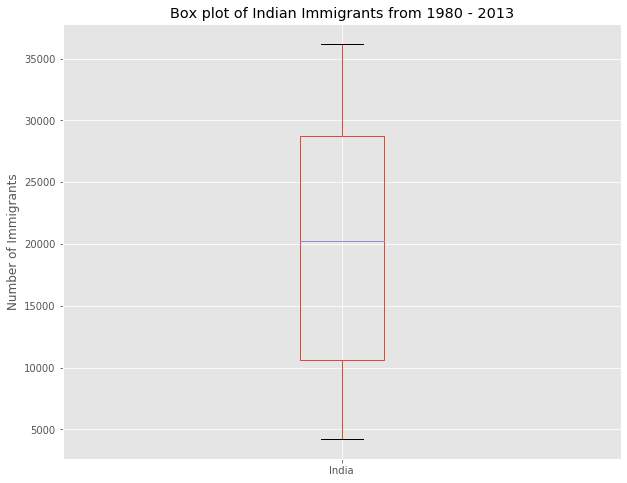

In [107]:
df_india.plot(kind="box", figsize = (10, 8))
plt.title('Box plot of Indian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [108]:
df_india.describe()

Country,India
count,34.000000
mean,20350.117647
std,10007.342579
min,4211.000000
25%,10637.750000
50%,20235.000000
75%,28699.500000
max,36210.000000


In [112]:
df_ci = df.loc[['China', 'India'], years].transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [113]:
df_ci.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


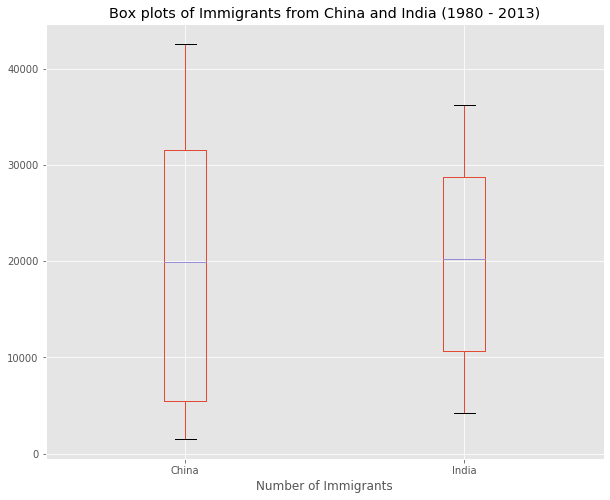

In [116]:
df_ci.plot(kind = "box", figsize = (10, 8))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

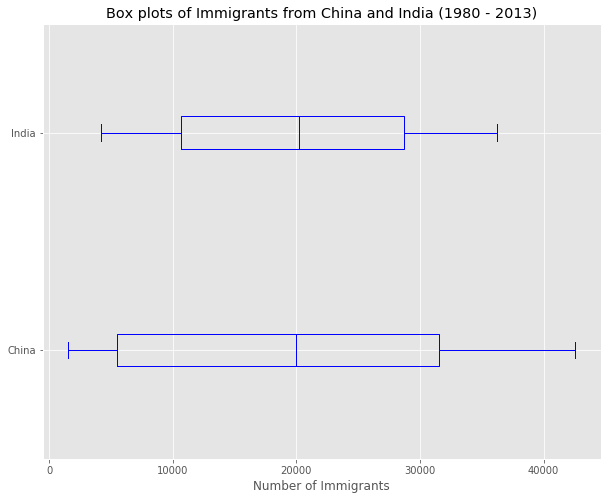

In [118]:
df_ci.plot(kind = "box", figsize = (10, 8), vert = False, color = 'blue')
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

Text(0.5, 0, 'Years')

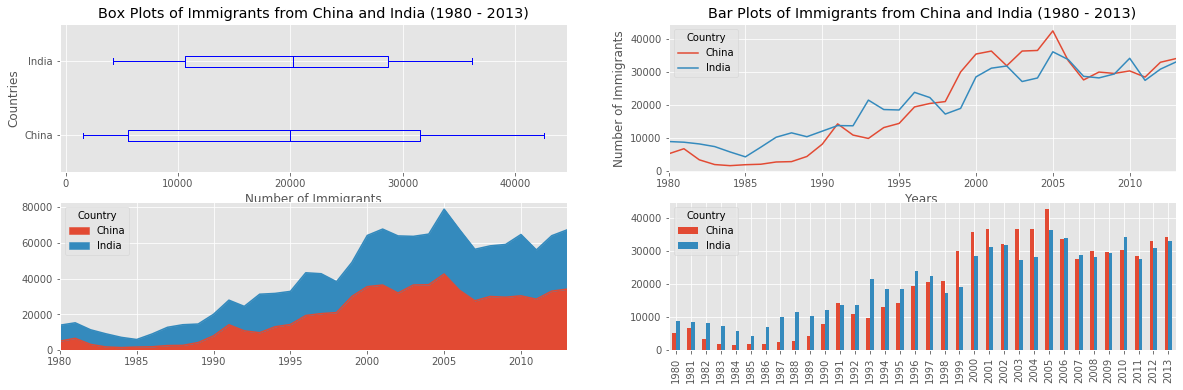

In [126]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_ci.plot(kind = "box", color = "blue", vert = False, figsize = (14, 6), ax = ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_ci.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

df_ci.plot(kind = "area", figsize=(14, 6), ax=ax2)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

df_ci.plot(kind = "bar", figsize=(20, 6), ax=ax3)
ax1.set_title ('Bar Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

In [134]:
df_1 = df.sort_values(by="Total", ascending = True, axis = 1)
df_1 = df_1.tail(15)
df_1.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Jamaica,Latin America and the Caribbean,Caribbean,Developing regions,3198,2634,2661,2455,2508,2938,4649,...,1945,1722,2141,2334,2456,2321,2059,2182,2479,106431
France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,...,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091
Lebanon,Asia,Western Asia,Developing regions,1409,1119,1159,789,1253,1683,2576,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,115359


In [138]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_1.loc[:, years_80s].sum(axis=1) 
df_90s = df_1.loc[:, years_90s].sum(axis=1) 
df_00s = df_1.loc[:, years_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})
new_df.tail()

,1980s,1990s,2000s
Country,,,
Pakistan,10591,65302,127598
Philippines,60764,138482,172904
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
China,32003,161528,340385
India,82154,180395,303591


In [139]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


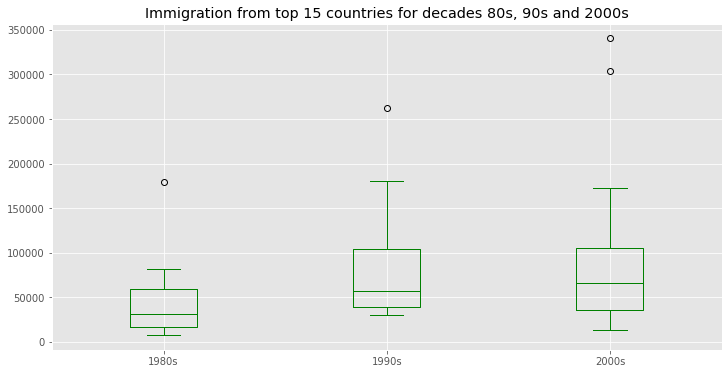

In [144]:
new_df.plot(kind = "box", figsize = (12, 6), color = "green")
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

Let's look at decade 2000s as an example: <br>
* Q1 (25%) = 36,101.5 <br>
* Q3 (75%) = 105,505.5 <br>
* IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5

In [145]:
new_df[new_df['2000s'] > 209611.5]

,1980s,1990s,2000s
Country,,,
China,32003,161528,340385
India,82154,180395,303591


Let's look at decade 1990s as an example: <br>
* Q1 (25%) = 39,259 <br>
* Q3 (75%) = 1,04,451 <br>
* IQR = Q3 - Q1 = 65,192 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 1,04,451 + (1.5 * 65,192) <br>
Outlier > 2,02,239

In [146]:
new_df[new_df['1990s'] > 202239]

,1980s,1990s,2000s
Country,,,
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413


In [155]:
df_tot = pd.DataFrame(df[years].sum(axis = 0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


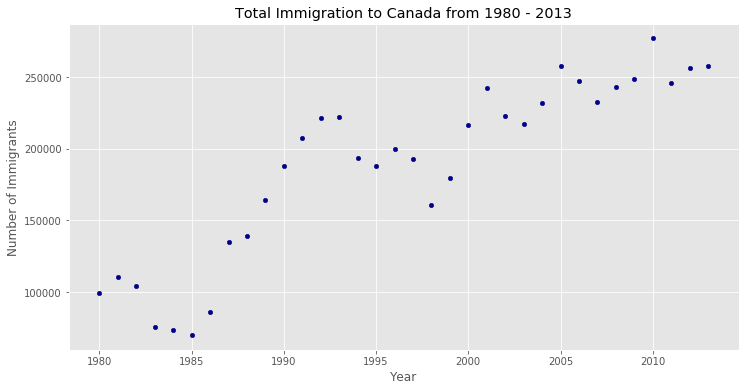

In [157]:
df_tot.plot(kind = "scatter", figsize=(12, 6), color='darkblue',x = 'year', y = 'total')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [158]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg = 1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

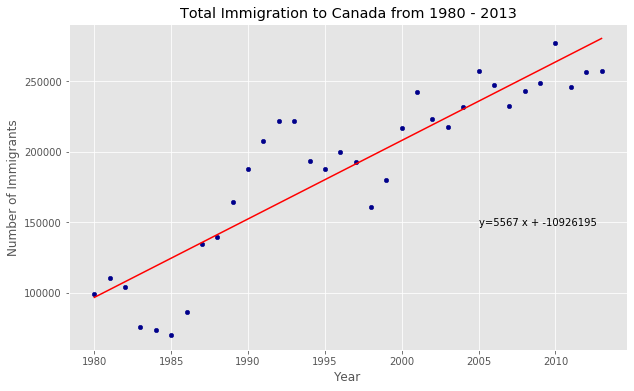

In [173]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.plot(x, fit[0] * x + fit[1], color = "red")
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2005, 148000))
plt.show()

In [174]:
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

'No. Immigrants = 5567 * Year + -10926195'

In [187]:
df_countries = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis = 1))
df_total.reset_index(inplace = True)
df_total.columns = ["year", "total"]
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


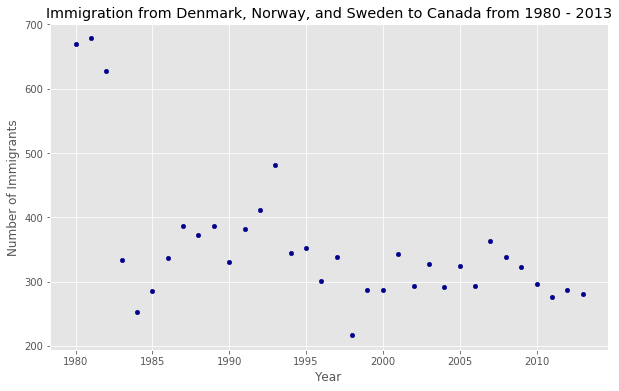

In [191]:
df_total.plot(kind = "scatter", x = "year", y = "total", figsize = (10, 6), color = "darkblue")
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Bubble plots

In [196]:
df_can_t = df[years].transpose()

df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [197]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

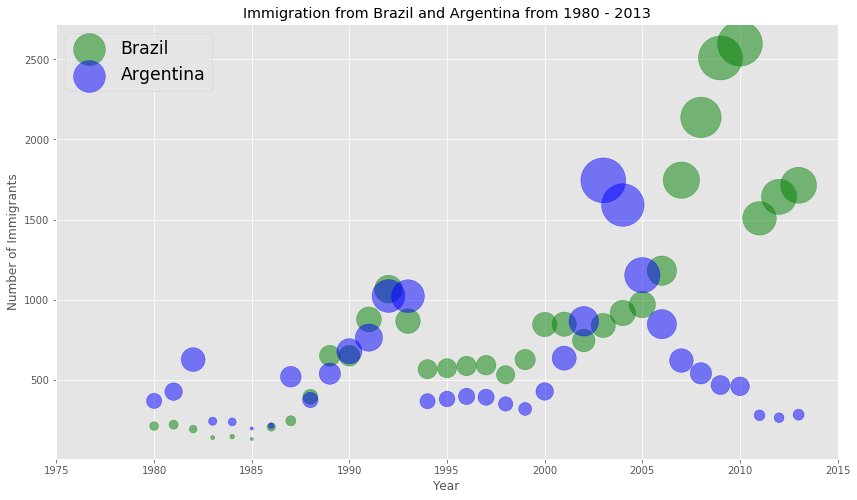

In [205]:
ax0 = df_can_t.plot(kind='scatter', x='Year', y='Brazil', figsize=(14, 8), alpha=0.5, color='green',
                    s = norm_brazil * 2000 + 10, xlim=(1975, 2015))

df_can_t.plot(kind='scatter', x='Year',y='Argentina', alpha=0.5, color="blue", 
              s = norm_argentina * 2000 + 10, ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='best', fontsize='xx-large')

In [206]:
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


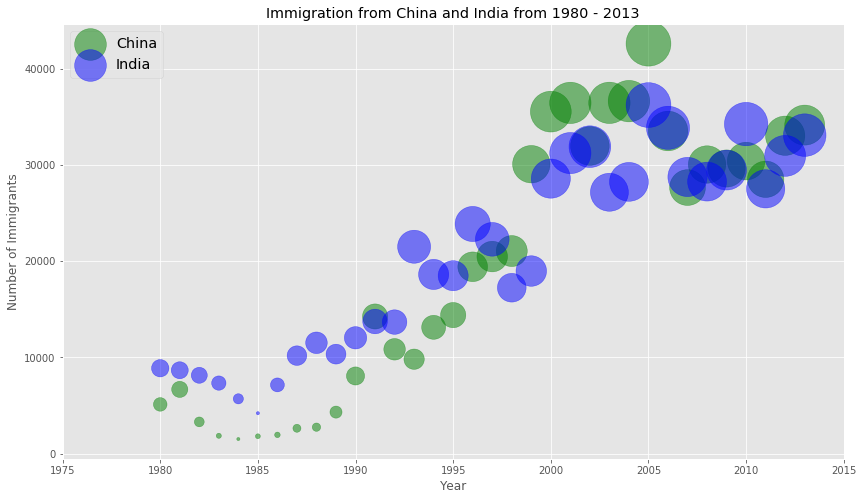

In [208]:
ax0 = df_can_t.plot(kind='scatter', x='Year', y='China', figsize=(14, 8),alpha=0.5,color='green',
                    s = norm_china * 2000 + 10, xlim=(1975, 2015))

df_can_t.plot(kind='scatter', x='Year', y='India', alpha=0.5, color="blue", s=norm_india * 2000 + 10,ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')